In [60]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Data Visualization
import seaborn as sns, pandas as pd

# Performance check
import timeit

In [61]:
# Generate Random Data
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,2.166985,3.618774
1,2.155409,1.599860
2,2.517488,0.854918
3,1.732840,0.822210
4,2.461130,0.903492


In [62]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 3, criterion='maxclust')

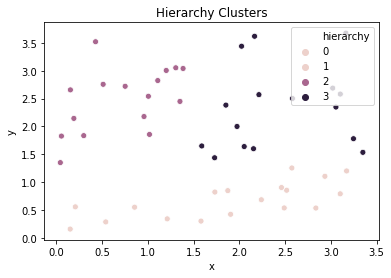

In [63]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [69]:
# Calculate Centroids with kmeans and add labels to df
centroids, distortion = kmeans(df, 3)
df['kmeans'], df['distortion'] = vq(df, centroids)

# Mean centroids in k-means
df[['x', 'y', 'kmeans']].groupby('kmeans').mean()

,x,y
kmeans,,
0,0.735749,2.484847
1,1.910790,0.674951
2,2.455607,2.340439


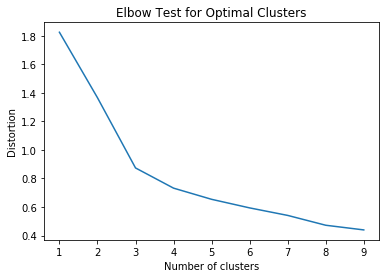

In [70]:
# Elbow method to determine optimal number of clusters
num_clusts = range(1, 10)
distortions = [kmeans(df, i)[1] for i in num_clusts]
sns.lineplot(num_clusts, distortions)
plt.title('Elbow Test for Optimal Clusters')
plt.ylabel('Distortion')
plt.xlabel('Number of clusters')
plt.show()

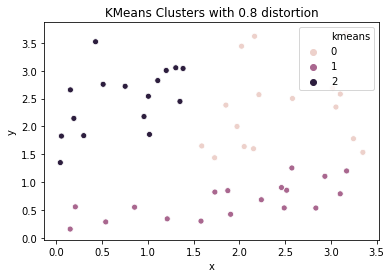

In [66]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title(f'KMeans Clusters with {round(distortion, 2)} distortion')
plt.show()


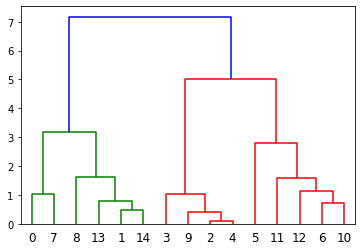

In [67]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()